In [1]:
from __future__ import division
import sys
import numpy as np
from pandas import read_csv
from matplotlib import pyplot as plt
from matplotlib import rc

# Set font size for labels and axes ticks (http://matplotlib.org/users/customizing.html)
rc('font', size=18)
rc('axes', titlesize=15)
rc('axes', labelsize=14)

rc('xtick', labelsize=11)
rc('ytick', labelsize=11)

rc('lines', markersize=4)

rc('legend',fontsize=12)

# axes.titlesize : 24
# axes.labelsize : 20
# lines.linewidth : 3
# lines.markersize : 10
# xtick.labelsize : 16
# ytick.labelsize : 16

%matplotlib inline
# Uncomment the following line if you have a mac with retina display
%config InlineBackend.figure_format='retina'

PATHS

NameError: name 'PATHS' is not defined

# Global variables

In [2]:
FILES_DICT = {#'n8.txt': r'$8^3$', 'n16.txt': r'$16^3$', 'n32.txt': r'$32^3$', 'n64.txt': r'$64^3$',
              'n128.txt': r'$128^3$', 'n256.txt': r'$256^3$', 'n512.txt': r'$512^3$', 'n1024.txt': r'$1024^3$',
              'ngc2903.txt': 'NGC2903', 'antennae.txt': 'Antennae'#, 'small.txt': 'small',
              #'timing_ngc_large.txt': 'ngc3031'
              }
FILENAMES = [#'n8.txt', 'n16.txt', 'n32.txt', 'n64.txt', 
             'n128.txt', 'n256.txt', 'n512.txt', 'n1024.txt',
             'ngc2903.txt', 'antennae.txt'#, 'small.txt',
             #'timing_ngc_large.txt'
             ]
SOURCES_CLEAN = ['4K',
                 'mac', 
                 #'g2', 
                 'nectar']
SOURCES = ['4K_', 
           'mac_', 
           #'g2_', 
           'nectar_'
          ]



FILENAMES_CANVAS_128 = ['n128_500_500.txt', 
                        'n128_1000_1000.txt',
                        'n128_1500_1500.txt',
                        'n128_2000_2000.txt',
                        #'n128_2500_2500.txt'
                       ]

FILENAMES_CANVAS_256 = ['n256_500_500.txt', 
                        'n256_1000_1000.txt',
                        'n256_1500_1500.txt',
                        'n256_2000_2000.txt',
                        #'n256_2500_2500.txt'
                       ]

FILENAMES_CANVAS_512 = ['n512_500_500.txt', 
                        'n512_1000_1000.txt',
                        'n512_1500_1500.txt',
                        'n512_2000_2000.txt',
                        #'n512_2500_2500.txt'
                       ]

FILENAMES_CANVAS_1024 = ['n1024_500_500.txt', 
                        'n1024_1000_1000.txt',
                        'n1024_1500_1500.txt',
                        'n1024_2000_2000.txt',
                        #'n1024_2500_2500.txt'
                        ]

FILES_DICT_CANVAS_SIZES_128 = {'n128_500_500.txt': r'$500^2$',
                    'n128_1000_1000.txt': r'$1000^2$',
                    'n128_1500_1500.txt': r'$1500^2$',
                    'n128_2000_2000.txt': r'$2000^2$',
                    #'n128_2500_2500.txt': r'$2500^2$'
                              }

FILES_DICT_CANVAS_SIZES_256 = {'n256_500_500.txt': r'$500^2$',
                    'n256_1000_1000.txt': r'$1000^2$',
                    'n256_1500_1500.txt': r'$1500^2$',
                    'n256_2000_2000.txt': r'$2000^2$',
                    #'n256_2500_2500.txt': r'$2500^2$'
                              }

FILES_DICT_CANVAS_SIZES_512 = {'n512_500_500.txt': r'$500^2$',
                    'n512_1000_1000.txt': r'$1000^2$',
                    'n512_1500_1500.txt': r'$1500^2$',
                    'n512_2000_2000.txt': r'$2000^2$',
                    #'n512_2500_2500.txt': r'$2500^2$'
                              }

FILES_DICT_CANVAS_SIZES_1024 = {'n1024_500_500.txt': r'$500^2$',
                    'n1024_1000_1000.txt': r'$1000^2$',
                    'n1024_1500_1500.txt': r'$1500^2$',
                    'n1024_2000_2000.txt': r'$2000^2$',
                    #'n1024_2500_2500.txt': r'$2500^2$'
                               }

CANVAS_PATH = 'timing_data/4K/canvas_size/'
CANVAS_PATH_DICT = {CANVAS_PATH[0]: ""}

# GeForce GT 750M (mac) -- GK107
# GeForce GTX TITAN X (4K) -- GM200-400
# GeForce GTX 470/PCIe/SSE2 (g2) -- GF100
# GRID K1 (nectar)

GPU = {'mac': 'GT 750M', 
       #'g2': 'GTX 470', 
       'nectar': 'GRID K1', 
       '4K': 'TITAN X'}

PATH_ROOT = 'timing_data/'

PATHS = []
PATHS_DICT = {}

for i in range(len(SOURCES_CLEAN)):
    PATHS.append(PATH_ROOT + SOURCES_CLEAN[i] + '/')
    PATHS_DICT[PATHS[i]] = SOURCES[i]

FILENAMES_TAGS = [#r'$8^3$', r'$16^3$', r'$32^3$', r'$64^3$', 
                  r'$128^3$', r'$256^3$', r'$512^3$', r'$1024^3$',
                  'NGC2903', 'Antennae'#, 'small',
                  #'ngc3031'
                  ]
TRANSFER_FUNCTIONS = ['MIP', 'WSP']

STATS = ['Minimum', 'Maximum', 'Mean', 'Median']

# Generic functions

In [3]:
def sort_numerical_keys(mydict):
    """
    Sort dictionary keys in numerical order

    :param mydict: dictionary
    :return: sorted keys list
    """
    return sorted(mydict, key=lambda key: mydict[key])

def sort_alpha_keys(mydict):
    """
    Sort dictionary keys in alphabetical order

    :param mydict: dictionary
    :return: sorted keys list
    """
    return sorted(mydict)

def is_numerical(value):
    """
    Check if value is numerical or alphanumerical

    :param value: a variable
    :return: Bool telling you if value is numerical or not
    """
    try:
        value = float(value)
        return True
    except:
        return False

def format_path(path):
    """
    Verify if path ends with a slash, and if not, adds one if required.

    :param path: a variable representing a path
    :return: returns path with an extra slash if required
    """
    if len(path) > 0 and path[-1] != '/':
        path = path + '/'
    return path

# Data cleaning and aggregation functions

In [4]:
def retrieve_data(filename):
    """
    Takes a timing experiment (slightly cleaned) output file, and makes it into a dictionary.

    :param filename: filename of the timing file outputed to console or to file by onecube.py
    :return: a dictionnary with values per visualisation parameter and transfer function
    """
    timing_data = {}
    start = True

    mip_wsp = 'MIP'

    timing_data['MIP'] = {}
    timing_data['WSP'] = {}

    skip_header = True
    try: 
        with open(filename, 'r') as f:
            for line in f:
                if skip_header:
                    if "MIP RAW" in line:
                        skip_header = False
                        if 'WSP' in line:
                            mip_wsp = 'WSP'
                        active_key = line.split('\n')[0].split(mip_wsp + ' ')[1].replace(" ", "")
                else:
                    if is_numerical(line) == False:
                        if 'WSP' in line:
                            mip_wsp = 'WSP'
                        active_key = line.split('\n')[0].split(mip_wsp + ' ')[1].replace(" ", "")
                    else:
                        try:
                            timing_data[mip_wsp][active_key].append(float(line))
                        except:
                            timing_data[mip_wsp][active_key] = []
                            timing_data[mip_wsp][active_key].append(float(line))
    except:
        pass
    return timing_data

In [5]:
def clean_raw_timing_data():
    """
    Calls retrieve_data() for each timing output file and creates a general dictionary
    :return: Merged timing results dictionary
    """

    data = {}

    # data = retrieve_data(files[0])

    for path in PATHS:
        for file in FILENAMES:
#             print (PATHS_DICT[format_path(path)] + FILES_DICT[file], format_path(path) + file)
            data[PATHS_DICT[format_path(path)] + FILES_DICT[file]] = retrieve_data(format_path(path) + file)

    return data

In [6]:
def clean_raw_timing_data_canvas_size_128():
    """
    Calls retrieve_data() for each timing output file and creates a general dictionary
    :return: Merged timing results dictionary
    """

    data = {}

    # data = retrieve_data(files[0])

    for file in FILENAMES_CANVAS_128:
        print (format_path(CANVAS_PATH) + file)
        data[FILES_DICT_CANVAS_SIZES_128[file]] = retrieve_data(format_path(CANVAS_PATH) + file)

    return data

In [7]:
def clean_raw_timing_data_canvas_size_256():
    """
    Calls retrieve_data() for each timing output file and creates a general dictionary
    :return: Merged timing results dictionary
    """

    data = {}

    # data = retrieve_data(files[0])

    for file in FILENAMES_CANVAS_256:
        data[FILES_DICT_CANVAS_SIZES_256[file]] = retrieve_data(format_path(CANVAS_PATH) + file)

    return data

In [8]:
def clean_raw_timing_data_canvas_size_512():
    """
    Calls retrieve_data() for each timing output file and creates a general dictionary
    :return: Merged timing results dictionary
    """

    data = {}

    # data = retrieve_data(files[0])

    for file in FILENAMES_CANVAS_512:
        data[FILES_DICT_CANVAS_SIZES_512[file]] = retrieve_data(format_path(CANVAS_PATH) + file)

    return data

In [9]:
def clean_raw_timing_data_canvas_size_1024():
    """
    Calls retrieve_data() for each timing output file and creates a general dictionary
    :return: Merged timing results dictionary
    """

    data = {}

    # data = retrieve_data(files[0])

    for file in FILENAMES_CANVAS_1024:
        data[FILES_DICT_CANVAS_SIZES_1024[file]] = retrieve_data(format_path(CANVAS_PATH) + file)

    return data

In [10]:
def make_unique_csv(data, path='timing_data/', filename='timing_summary_local.csv'):
    """
    Creates a csv file with basic stats from merged data generated by clean_raw_timing_data().
    Stats include : min, max, mean, and median.

    :param data: Merged dictionary generated by clean_raw_timing_data()
    :return: Condensed csv file
    """
    # Raw=1, Box3=3, Box5=5, Gauss5=(3+2+2)=7, Box7, Box9, Box11, Gauss9=(5+4+4)=13, Box13, Gauss13=(7+6+6)=19.
    indexes = {
#         'RAW': 1,
#         'BOX3': 2,
#         'BOX5': 3,
#         'Gauss5': 8,
#         'BOX7': 4,
#         'BOX9': 5,
#         'BOX11': 6,
#         'BOX13': 7,
#         'Gauss9': 9,
#         'Gauss13': 10
        'RAW': 1,
        'BOX3': 2,
        'BOX5': 3,
        'Gauss5': 4,
        'BOX7': 5,
        'BOX9': 6,
        'BOX11': 7,
        'Gauss9': 8,
        'BOX13': 9,
        'Gauss13': 10
        }
    
    filename_indexes = {
#         r'$8^3$': 1, 
#         r'$16^3$': 2, 
#         r'$32^3$':3, 
#         r'$64^3$':4, 
        r'$128^3$':1, 
        r'$256^3$':2, 
        r'$512^3$': 3,
        r'$1024^3$': 4,
        'NGC2903':6,
        'Antennae':5#, 
#         'small': 8
    }

    with open(format_path(path)+filename, 'w+') as f:
        f.write('source,filename,filename_idx,tf,parameter,parameter_idx,Minimum,Maximum,Mean,Median\n')
        for key_file in data.keys():
            for key_data in data[key_file].keys():
                for key_param in sorted(data[key_file][key_data].keys()):
                    f.write(str(key_file).split('_')[0] + ',') 
                    f.write(str(key_file).split('_')[1] + ',')
                    f.write(str(filename_indexes[str(key_file).split('_')[1]]) + ',')
                    f.write(str(key_data) + ',')
                    f.write(str(key_param) + ',')
                    f.write(str(indexes[key_param]) + ',')
                    
                    f.write(str(np.min(data[key_file][key_data][key_param])) + ',')
                    f.write(str(np.max(data[key_file][key_data][key_param])) + ',')
                    f.write(str(np.mean(data[key_file][key_data][key_param])) + ',')
                    f.write(str(np.median(data[key_file][key_data][key_param])) + '\n')

In [11]:
def make_unique_csv_canvas_size(data, path='timing_data/', filename='timing_summary_canvas_sizes.csv', v=None):
    """
    Creates a csv file with basic stats from merged data generated by clean_raw_timing_data().
    Stats include : min, max, mean, and median.

    :param data: Merged dictionary generated by clean_raw_timing_data()
    :return: Condensed csv file
    """
    # Raw=1, Box3=3, Box5=5, Gauss5=(3+2+2)=7, Box7, Box9, Box11, Gauss9=(5+4+4)=13, Box13, Gauss13=(7+6+6)=19.
    indexes = {
#         'RAW': 1,
#         'BOX3': 2,
#         'BOX5': 3,
#         'Gauss5': 8,
#         'BOX7': 4,
#         'BOX9': 5,
#         'BOX11': 6,
#         'BOX13': 7,
#         'Gauss9': 9,
#         'Gauss13': 10
        'RAW': 1,
        'BOX3': 2,
        'BOX5': 3,
        'Gauss5': 4,
        'BOX7': 5,
        'BOX9': 6,
        'BOX11': 7,
        'Gauss9': 8,
        'BOX13': 9,
        'Gauss13': 10
        }
    
    filename_indexes = {
#         r'$8^3$': 1, 
#         r'$16^3$': 2, 
#         r'$32^3$':3, 
#         r'$64^3$':4, 
        r'$500^2$':1, 
        r'$1000^2$':2, 
        r'$1500^2$': 3,
        r'$2000^2$': 4,
        r'$2500^2$': 5,
#         'small': 8
    }
        
        
    with open(format_path(path)+filename, 'w+') as f:
        f.write('source,filename,filename_idx,tf,parameter,parameter_idx,Minimum,Maximum,Mean,Median\n')
        for key_file in data.keys():
            for key_data in data[key_file].keys():
                for key_param in sorted(data[key_file][key_data].keys()):
#                     print (key_file, key_data, key_param, indexes[key_param])
                    f.write(str('4K') + ',' + 
                            str(key_file) + ',' + 
                            str(filename_indexes[str(key_file)]) + ',' +
                            str(key_data) + ',' + 
                            str(key_param) + ',' + 
                            str(indexes[key_param]) + ',')
                    
                    f.write(str(np.min(data[key_file][key_data][key_param])) + ',')
                    f.write(str(np.max(data[key_file][key_data][key_param])) + ',')
                    f.write(str(np.mean(data[key_file][key_data][key_param])) + ',')
                    f.write(str(np.median(data[key_file][key_data][key_param])) + '\n')

In [12]:
def eval_slowdown(path='timing_data/', filename='timing_summary_local.csv', log_scale=False):
    """
    Creates two multi-subplots bar plots (MIP and WSP) using pandas and matplotlib
    and saves as PDF

    :param filename: csv file generated by make_unique_csv(...)
    :param log_scale: Bool to say if yscale should be set to log
    :return: nothing.
    """

    path = format_path(path)

    csv_filename = path + filename

    df = read_csv(csv_filename)
    
    for tf in TRANSFER_FUNCTIONS:
        for file in FILENAMES_TAGS:
            for source in SOURCES_CLEAN:
                for stat in STATS:
                    for param in df['parameter'].unique():

                        try:
                            current = df.loc[(df['filename'] == file) & 
                                             (df['source'] == source) & 
                                             (df['tf'] == tf) & 
                                             (df['parameter'] == param), (stat)].values[0]

                            raw = df.loc[(df['filename'] == file) & 
                                             (df['source'] == source) & 
                                             (df['tf'] == tf) & 
                                             (df['parameter'] == 'RAW'), (stat)].values[0]

                            # updated_value = current/raw
                            df.loc[(df['filename'] == file) & 
                                   (df['source'] == source) & 
                                   (df['tf'] == tf) & 
                                   (df['parameter'] == param), 
                                   (stat)] = raw / current
                        except: 
                            print (file, source, tf, param, stat)

    return df

In [13]:
def get_fps_data(path='timing_data/', filename='timing_summary_local.csv', log_scale=False):
    """
    Read csv and returns dataframe

    :param filename: csv file generated by make_unique_csv(...)
    :param log_scale: Bool to say if yscale should be set to log
    :return: nothing.
    """

    path = format_path(path)

    csv_filename = path + filename

    return read_csv(csv_filename)

# Calling functions and tests

In [14]:
data = clean_raw_timing_data()

In [15]:
make_unique_csv(data)

In [16]:
#df_slowdown = eval_slowdown()

In [17]:
df_fps = get_fps_data()

# Changing CANVAS size

In [18]:
data_128 = clean_raw_timing_data_canvas_size_128()
data_256 = clean_raw_timing_data_canvas_size_256()
data_512 = clean_raw_timing_data_canvas_size_512()
data_1024 = clean_raw_timing_data_canvas_size_1024()

timing_data/4K/canvas_size/n128_500_500.txt
timing_data/4K/canvas_size/n128_1000_1000.txt
timing_data/4K/canvas_size/n128_1500_1500.txt
timing_data/4K/canvas_size/n128_2000_2000.txt


In [19]:
make_unique_csv_canvas_size(data_128, filename='timing_summary_canvas_size_128.csv')
make_unique_csv_canvas_size(data_256, filename='timing_summary_canvas_size_256.csv')
make_unique_csv_canvas_size(data_512, filename='timing_summary_canvas_size_512.csv')
make_unique_csv_canvas_size(data_1024, filename='timing_summary_canvas_size_1024.csv')

In [20]:
df_fps_128 = get_fps_data(path='timing_data/', filename='timing_summary_canvas_size_128.csv')
df_fps_256 = get_fps_data(path='timing_data/', filename='timing_summary_canvas_size_256.csv')
df_fps_512 = get_fps_data(path='timing_data/', filename='timing_summary_canvas_size_512.csv')
df_fps_1024 = get_fps_data(path='timing_data/', filename='timing_summary_canvas_size_1024.csv')

# Plot

In [21]:
def make_plot(df, tf='MIP', param='Maximum', source=None, ylabel='Slowdown', ann_x = None, ann_y = None, 
              sharex=True, sharey=False, ylog=False, ylim=None, saveit=False, 
              output_filename=None, show_fig=False):
    
#     markrs = ['D-', 'd--', "s-", "p--", "P-", "X--", "x-","o--"]
    markrs = ['D', 'd', "s", "p", "P", "X", "x","o"]

    if source != None:
        # Single plot
        mrkr_cpt = 0
        for filename in df.sort_values(by='filename_idx')['filename'].unique(): 
            x_ticklabels = df.loc[(df['source'] == source) &
                                  (df['filename'] == filename) & 
                                  (df['tf'] == tf)].sort_values(by='parameter_idx')['parameter']

            y = df.loc[(df['source'] == source) &
                                (df['filename'] == filename) & 
                                (df['tf'] == tf)].sort_values(by='parameter_idx')

            x = np.arange(1, len(y[param])+1, 1)

            plt.plot(x, y[param], markrs[mrkr_cpt])

            if mrkr_cpt < len(markrs)-1:
                mrkr_cpt+=1
            else:
                mrkr_cpt = 0

        if ylim != None:
            axes = plt.gca()
            axes.set_ylim(ylim)

        if ylog == True:
            axes = plt.gca()
            axes.set_yscale('log')

        plt.legend(df.sort_values(by='filename_idx')['filename'].unique(), 
                   bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        plt.xticks(x, np.array(x_ticklabels), rotation=270)
        plt.ylabel(ylabel)
        plt.xlabel('Smoothing parameter')

        plt.show()
    else:
        # Multi subplots
        f, axarr = plt.subplots(3,2, figsize=(9,9), sharex=sharex, sharey=sharey)

        i = 0
        j = 0
        
        
        for tf in TRANSFER_FUNCTIONS:
            for source in SOURCES_CLEAN:
                mrkr_cpt = 0
                w = 2
                for filename in df.sort_values(by='filename_idx')['filename'].unique(): 
                    x_ticklabels = df.loc[(df['source'] == source) &
                                          (df['filename'] == filename) & 
                                          (df['tf'] == tf)].sort_values(by='parameter_idx')['parameter']

                    y = df.loc[(df['source'] == source) &
                                        (df['filename'] == filename) & 
                                        (df['tf'] == tf)].sort_values(by='parameter_idx')

                    x = np.arange(1, len(y[param])+1, 1)

                    axarr[i,j].plot(x, y[param], markrs[mrkr_cpt], linewidth=w)

                    if w > 0.5:
                        w -= 0.3
                    else:
                        w += 0.3
                    axarr[i,j].set_adjustable('box-forced')
#                     axarr[i,j].set_aspect('equal')   

                    if j == 0 and i == 2:
                        plt.xticks(x)
                        axarr[i,j].set_xticklabels(np.array(x_ticklabels), rotation=270)

#                         axarr[i,j].set_xlabel('Parameter')


                    if sharey==False:
                        if i in [0, 1]: 
                            axarr[i,j].set_ylim([0,60])
                        else:
                            axarr[i,j].set_ylim([0,30])


                    if j == 0 and i == 2:
                        axarr[i,j].set_ylabel(ylabel)                        

                    if j == 1 and i == 2:
                        plt.xticks(x)
                        axarr[i,j].set_xticklabels(np.array(x_ticklabels), rotation=270)

                    if mrkr_cpt < len(markrs)-1:
                        mrkr_cpt+=1
                    else:
                        mrkr_cpt = 0
                i+=1
            j+=1
            i=0


        i = 0
        j = 0
        for source in SOURCES_CLEAN:
            lim = axarr[i,j].get_ylim()
            if sharey==False:
                if i == 1:
                    x = ann_x
                    y = 53
                elif i == 2: 
                    x = ann_x
                    y = 26.5
                else: 
                    x = ann_x
                    y = 53
                    
            else: 
                if ann_y == None:
                    if ylog:
                        y = 1.5
                    else:
        #                 y = (lim[1] - lim[0])/2
                        y = 9
                else:
                    y = ann_y

                if ann_x == None:
                    x = 1
                else:
                    x = ann_x
            axarr[i,j].annotate(GPU[source], xy=(x, y), size=12)
            i+=1
            
        if ylim != None:
            axes = plt.gca()
            axes.set_ylim(ylim)

        if ylog == True:
            axes = plt.gca()
            axes.set_yscale('log')

        axarr[0,0].set_title("MIP")
        axarr[0,1].set_title("WSP")
            
        plt.legend(df.sort_values(by='filename_idx')['filename'].unique(), 
                   loc='lower center', ncol=3, 
                   bbox_to_anchor=(-0.15, -0.9),
#                    bbox_to_anchor=(1.05, 3.5), loc=2, 
                   borderaxespad=0., title="Spectral cube")
        
        if saveit:
            plt.savefig(output_filename, dpi=300, bbox_inches = 'tight')

        if show_fig:
            plt.show()

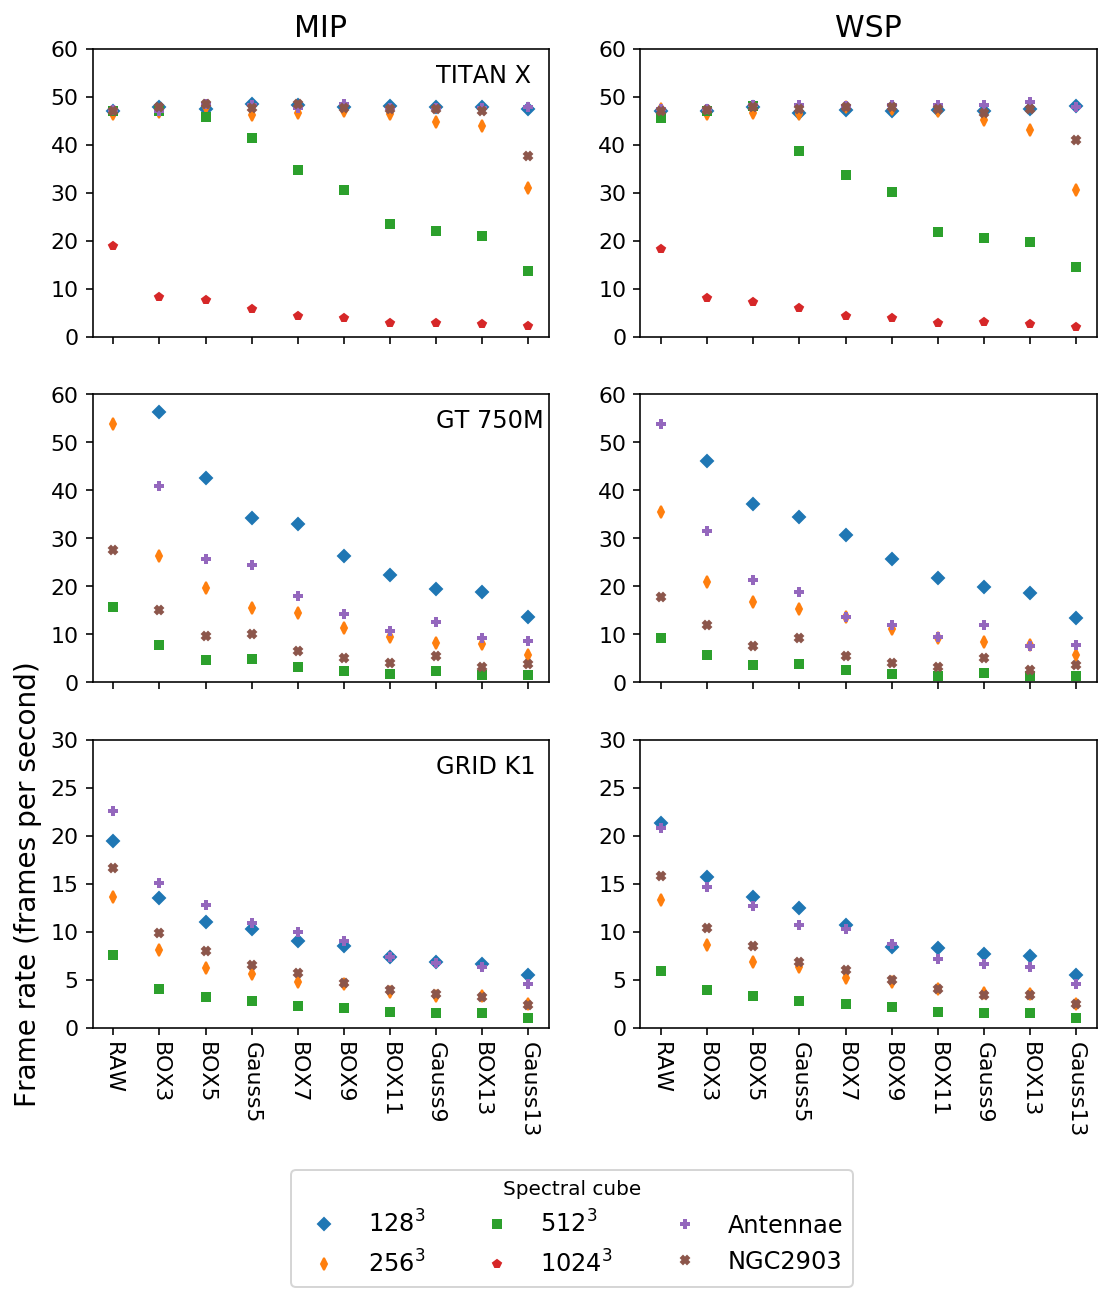

In [23]:
path = '/Users/danyvohl/Documents/Etudes/Doctorat/Australie/articles/writing/Paper_VI-shader/images/'

# for tf in TRANSFER_FUNCTIONS:
    #for param in STATS:
for param in ['Median']:
    make_plot(df_fps, param=param, 
              ylabel='Frame rate (frames per second)', saveit=True, ann_y = 55, ann_x = 8, sharey=False, #ylog=True, ylim = [1, 100],
              output_filename=path + param +'_fps.pdf')

In [310]:
# path = '/Users/danyvohl/Documents/Etudes/Doctorat/Australie/articles/writing/Paper_VI-shader/images/'

# # for tf in TRANSFER_FUNCTIONS:
#     #for param in STATS:
# for param in ['Median']:
#     make_plot(df_slowdown, param=param, 
#               ylabel='Slowdown', saveit=True, ylim = [0.9, 12], ylog = True, ann_y = 6,
#               output_filename=path + param +'_slowdown.pdf')

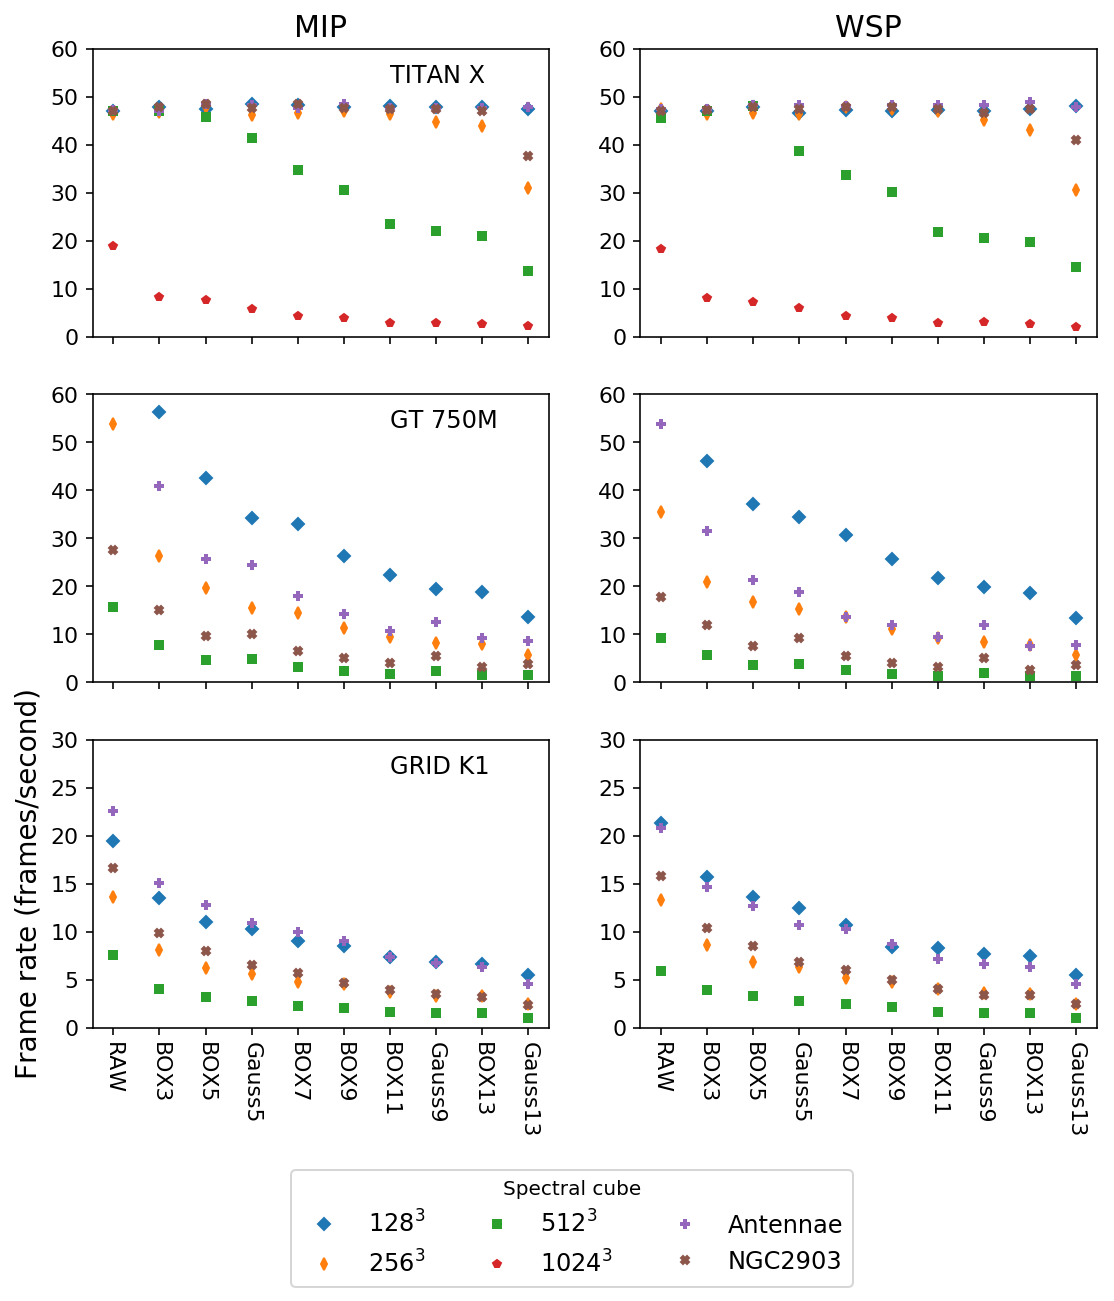

In [361]:
path = '/Users/danyvohl/Documents/Etudes/Doctorat/Australie/articles/writing/Paper_VI-shader/images/'

# for tf in TRANSFER_FUNCTIONS:
    #for param in STATS:
for param in ['Median']:
    make_plot(df_fps, param=param, 
              ylabel='Frame rate (frames/second)', saveit=True, ann_y = 60, ann_x = 7, #sharey=False, #ylog=True, ylim = [1, 100],
              output_filename=path + param +'_fps.pdf')

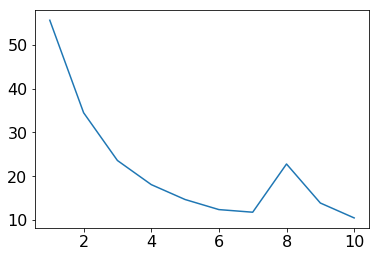

In [53]:
x_ticklabels = df_fps.loc[(df_fps['source'] == 'mac') & 
           (df_fps['tf'] == 'MIP') & 
           (df_fps['filename'] == 'antennae')].sort_values(by='parameter_idx')['parameter']

y = df_fps.loc[(df_fps['source'] == 'mac') & 
           (df_fps['tf'] == 'MIP') & 
           (df_fps['filename'] == 'antennae')].sort_values(by='parameter_idx')

x = np.arange(1, len(y)+1, 1)

plt.plot(x,y['Maximum'])
# plt.xticks(x, np.array(x_ticklabels), rotation=270)
plt.show()

In [63]:
df_slowdown.to_csv('slowdown.csv')

In [384]:
def make_plot_canvas(df, tf='MIP', param='Maximum', source=None, ylabel='FPS', ann_x = None, ann_y = None, 
              sharex=True, sharey=True, ylog=False, ylim=None, saveit=False, 
              output_filename=None, show_fig=False):
    
#     markrs = ['D-', 'd--', "s-", "p--", "P-", "X--", "x-","o--"]
    markrs = ['D', 'd', "s", "p", "P", "X", "x","o"]

    plt.clf()
    f, axarr = plt.subplots(2,2, figsize=(9,6), sharex=sharex, sharey=sharey)

    i = 0
    j = 0
    
    ii = 0
    strings = ['$128^3$', '$256^3$', '$512^3$', '$1024^3$']
    
    for df in [df_fps_128, df_fps_256, df_fps_512, df_fps_1024]:
        # Single plot
        mrkr_cpt = 0
        for filename in df.sort_values(by='filename_idx')['filename'].unique(): 
            x_ticklabels = df.loc[(df['source'] == source) &
                                  (df['filename'] == filename) & 
                                  (df['tf'] == tf)].sort_values(by='parameter_idx')['parameter']

            y = df.loc[(df['source'] == source) &
                                (df['filename'] == filename) & 
                                (df['tf'] == tf)].sort_values(by='parameter_idx')

            x = np.arange(1, len(y[param])+1, 1)

            axarr[i,j].plot(x, y[param], markrs[mrkr_cpt])
            
            if sharey==False:
                if i == 0 or (i==1 and j==0): 
                    axarr[i,j].set_ylim([0,60])
                else:
                    axarr[i,j].set_ylim([0,30])
                    
            if i == 1:
                plt.xticks(x)
                axarr[i,j].set_xticklabels(np.array(x_ticklabels), rotation=270)
                
            if j == 0 and i == 1:
                axarr[i,j].set_ylabel(ylabel)

            if mrkr_cpt < len(markrs)-1:
                mrkr_cpt+=1
            else:
                mrkr_cpt = 0

        if sharey == False:
            if ylim != None:
                axes = plt.gca()
                axes.set_ylim(ylim)

        if ylog == True:
            axes = plt.gca()
            axes.set_yscale('log')
            
#         print (strings[ii])
        if j == 0 and i == 0:
            axarr[i, j].annotate(strings[ii], xy=(8.9, 3), size=12)
        elif j == 0 and i == 1:
            axarr[i, j].annotate(strings[ii], xy=(8.9, 45), size=12)
        elif j == 1 and i == 0:
            axarr[i, j].annotate(strings[ii], xy=(8.9, 3), size=12)
        else: 
            axarr[i, j].annotate(strings[ii], xy=(8.56, 45), size=12)
            #        axarr[i, j].annotate(strings[ii], xy=(0.8, 1), size=12)

        plt.legend(df.sort_values(by='filename_idx')['filename'].unique(), 
                   loc='lower center', ncol=5, 
                   bbox_to_anchor=(-0.15, -0.7), borderaxespad=0.,
                   title="Canvas size")
        
        if j < 1:
            j += 1
        else:
            i += 1
            j = 0
        ii += 1

#     plt.xticks(x, np.array(x_ticklabels), rotation=270)

    plt.xlabel('')

#         plt.show()

    plt.savefig(output_filename, dpi=300, bbox_inches = 'tight')



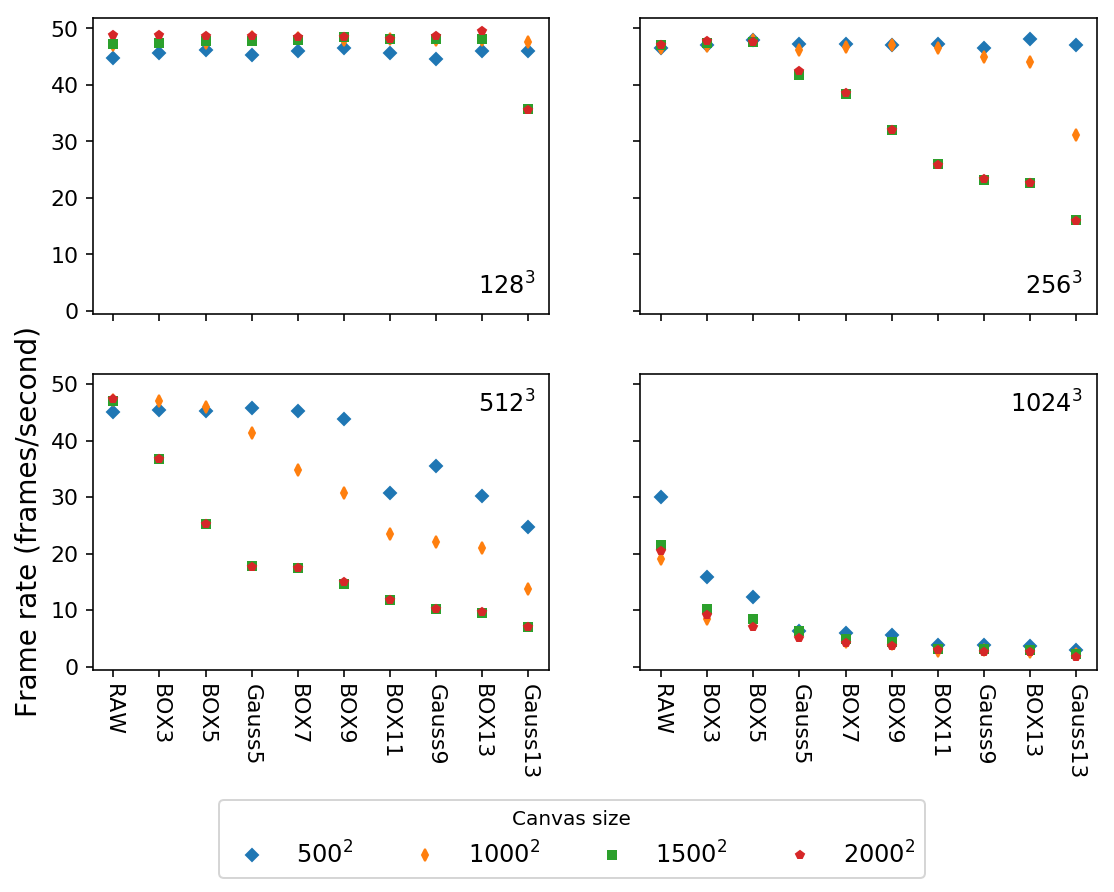

In [385]:
path = '/Users/danyvohl/Documents/Etudes/Doctorat/Australie/articles/writing/Paper_VI-shader/images/'

# for tf in TRANSFER_FUNCTIONS:
    #for param in STATS:
i = 0
strings = ['128_', '256_', '512_']
# for df in [df_fps_128, df_fps_256, df_fps_512]:
#     print (path + strings[i] + param +'_fps.pdf')
for param in ['Median']:
    make_plot_canvas(df_fps_128, param=param, source='4K',
              ylabel='Frame rate (frames/second)', saveit=True, ann_y = 50, ann_x = 7, sharey=True, #ylog=True, ylim = [1, 100],
              output_filename=path + 'canvas_size_Median_fps.pdf')
    i += 1

In [181]:
df_fps['filename']

0      Antennae
1      Antennae
2      Antennae
3      Antennae
4      Antennae
5      Antennae
6      Antennae
7      Antennae
8      Antennae
9      Antennae
10     Antennae
11     Antennae
12     Antennae
13     Antennae
14     Antennae
15     Antennae
16     Antennae
17     Antennae
18     Antennae
19     Antennae
20      $256^3$
21      $256^3$
22      $256^3$
23      $256^3$
24      $256^3$
25      $256^3$
26      $256^3$
27      $256^3$
28      $256^3$
29      $256^3$
         ...   
290     NGC2903
291     NGC2903
292     NGC2903
293     NGC2903
294     NGC2903
295     NGC2903
296     NGC2903
297     NGC2903
298     NGC2903
299     NGC2903
300     $128^3$
301     $128^3$
302     $128^3$
303     $128^3$
304     $128^3$
305     $128^3$
306     $128^3$
307     $128^3$
308     $128^3$
309     $128^3$
310     $128^3$
311     $128^3$
312     $128^3$
313     $128^3$
314     $128^3$
315     $128^3$
316     $128^3$
317     $128^3$
318     $128^3$
319     $128^3$
Name: filename, dtype: o

In [238]:
df_fps_1024

,source,filename,filename_idx,tf,parameter,parameter_idx,Minimum,Maximum,Mean,Median
